In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline ## facilita a plotagem de gráficos do matplotlib logo abaixo das células de c´digo de armazenamento delas no documento do notebook

In [3]:
assets = ['PG', '^GSPC'] #PeG, SP500
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2010-1-1')['Adj Close']

In [4]:
pf_data.tail()

,PG,^GSPC
Date,,
2021-12-28,162.839996,4786.350098
2021-12-29,164.190002,4793.060059
2021-12-30,162.770004,4778.729980
2021-12-31,163.580002,4766.180176
2022-01-03,160.960007,4781.959961


<AxesSubplot:xlabel='Date'>

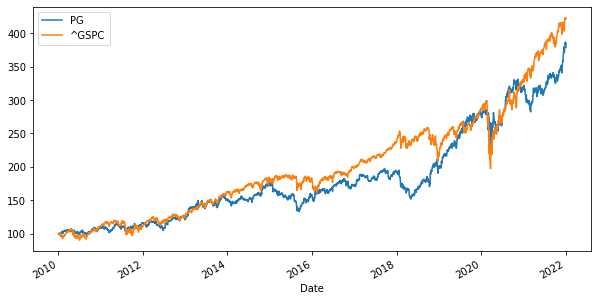

In [5]:
##normalizar pra base 100 e plotar no gráfico
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [6]:
#levantando retornos logarítmos
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
#media anual
log_returns.mean() * 250

PG       0.110261
^GSPC    0.119165
dtype: float64

In [9]:
#covariancia anual
log_returns.cov() * 250

,PG,^GSPC
PG,0.028493,0.016855
^GSPC,0.016855,0.029450


In [10]:
#PeG e SP500 tiveram retorno consistente (pelo .mean())

In [12]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.581871
^GSPC,0.581871,1.000000


In [13]:
#boa correlacao

In [15]:
#tamanho de ativos por len
num_assets = len(assets)

In [18]:
#criando pesos aleatórios na carteira para cada ativo, onde este cálculo faz sentido por ser uma matriz/array
weights = np.random.random(num_assets)
weights = weights / np.sum(weights)
weights

array([0.41013146, 0.58986854])

In [19]:
#confirmando
weights[0] + weights [1]

1.0

### Retorno esperado da carteira 

In [20]:
np.sum(weights * log_returns.mean()) * 250

0.11551327300698798

### Variancia esperada da carteira

In [22]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.023195225957873503

### Volatilidade esperada

In [23]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.15229978974993202

### Distribuindo pesos num loop de 1000 pesos diferentes

In [27]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.11282022, 0.11557477, 0.11390029, 0.11405702, 0.11692875,
        0.11178287, 0.11481023, 0.11353386, 0.11862605, 0.11472368,
        0.11865155, 0.11897736, 0.11249451, 0.11135292, 0.11770782,
        0.11716791, 0.11799501, 0.11600928, 0.11485702, 0.11807284,
        0.11315885, 0.11511487, 0.11068894, 0.11139405, 0.11441556,
        0.11367688, 0.11891053, 0.11542008, 0.11564122, 0.11861558,
        0.11310742, 0.11634855, 0.11863102, 0.11372252, 0.11516071,
        0.11213367, 0.1153352 , 0.1160045 , 0.1136059 , 0.11176744,
        0.11366187, 0.11110499, 0.1150492 , 0.11379589, 0.11892235,
        0.11630297, 0.11544225, 0.11786036, 0.1169195 , 0.1104063 ,
        0.11469792, 0.11200601, 0.11289094, 0.11466573, 0.11567012,
        0.11673253, 0.118575  , 0.115858  , 0.11526573, 0.11587207,
        0.11363312, 0.11613383, 0.11551692, 0.11067902, 0.11594938,
        0.11345566, 0.11636226, 0.11401049, 0.11553989, 0.11033117,
        0.1149084 , 0.11512636, 0.11830004, 0.11

In [28]:
##criando uma lista DataFrame para mostrar nossos retornos e as volatilidades
portfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities})

In [29]:
portfolios.head()

,Return,Volatility
0,0.112820,0.154290
1,0.115575,0.152424
2,0.113900,0.151750
3,0.114057,0.151574
4,0.116929,0.157010


In [30]:
portfolios.tail()

,Return,Volatility
995,0.119104,0.171108
996,0.111335,0.161365
997,0.111313,0.161500
998,0.115387,0.152069
999,0.114117,0.151520


Text(0, 0.5, 'Expected Returns')

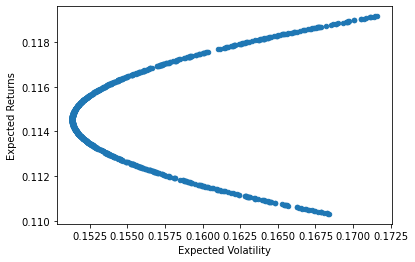

In [32]:
#plotando todo o estudo em um gráfico de dispersão (scatter)
portfolios.plot(x='Volatility', y='Return', kind='scatter')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')